# 比率の差の検定(Ztest)
## 帰無仮説
- 施策の効果はなかった。つまり確率p1-p2=0
## 対立仮説
- 施策に効果はあった。p1<p2で施策後の確率が大きく p1 - p2は負の値を取るため下側検定と言える

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import iqr
import scipy.stats as stats
from scipy.stats import gmean
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from statsmodels.stats.power import TTestIndPower
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from IPython.display import display, Javascript
%matplotlib inline

display(Javascript('IPython.notebook.execute_cells([IPython.notebook.get_selected_index()])'))

<IPython.core.display.Javascript object>

In [2]:
df = sns.load_dataset('tips')

df['tip_rate'] = df['tip'] / df['total_bill']

In [3]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# アクティブユーザー数
user_before = 550
user_after = 700

# 標本の大きさ
n = 1500

# Zテストの実行、alternativeの引数'smaller'は下側検定
stat, p_value = proportions_ztest([user_before, user_after], [n, n], alternative='smaller')

# 有意水準
alpha = 0.05

# 結果の表示
if p_value < alpha:
    print("帰無仮説を棄却し、対立仮説を採用します。")
else:
    print("帰無仮説を採用します。")


帰無仮説を棄却し、対立仮説を採用します。


In [4]:
p_value

1.3886899053083603e-08

提供していただいた数値 1.3886899053083603e-08 は、非常に小さな値です。これは指数表記（科学的な表記法）であり、e-08 は 10 の -8 乗を表します。つまり、この数値は非常に小さな確率を示しています。

この場合、p_value が 1.3886899053083603e-08 であるということは、帰無仮説に従ったデータが観測される確率が非常に低いことを意味します。有意水準を通常の 0.05 と比較すると、 1.3886899053083603e-08 は非常に小さいため、統計的に有意となります。したがって、この値をもとに判断すると、帰無仮説は棄却され、対立仮説が採用される可能性が高いです。

簡単に言うと、非常に小さな p_value は、結果が偶然ではなく統計的に有意であることを示すものです。

# 統計的に有意であるため施策は効果があったと言える

# 平均値差の検定

In [5]:
# ステューデントのt検定
stats.ttest_ind(df['tip'],df['tip'],equal_var=True)

TtestResult(statistic=0.0, pvalue=1.0, df=486.0)

In [6]:
# ウェルチのt検定
stats.ttest_ind(df['tip'],df['tip'],equal_var=False)

TtestResult(statistic=0.0, pvalue=1.0, df=486.00000000000006)

In [7]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)

In [8]:
# ステューデントのt検定
stats.ttest_ind(sample_df1['tip'],sample_df2['tip'],equal_var=True)

TtestResult(statistic=1.2633374110892317, pvalue=0.20946521127163184, df=98.0)

In [9]:
# ウェルチのt検定
stats.ttest_ind(sample_df1['tip'],sample_df2['tip'],equal_var=False)

TtestResult(statistic=1.2633374110892317, pvalue=0.20988704596567107, df=85.8759681954742)

## 平均値差の検定

In [10]:
female_tip_rate = df[df['sex']=='Female']['tip_rate']
male_tip_rate = df[df['sex']=='Male']['tip_rate']

## 男性と女性のチップ割合に差があるかどうかを検定したい

In [11]:
print(np.mean(female_tip_rate), np.mean(male_tip_rate))

0.16649073632892478 0.15765054700429743


In [12]:
print(np.var(male_tip_rate), np.var(female_tip_rate))

0.004169445577529409 0.00284330042554882


In [13]:
# ステューデントのt検定
stats.ttest_ind(male_tip_rate,female_tip_rate,equal_var=True)

TtestResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489, df=242.0)

In [14]:
# ウェルチのt検定
stats.ttest_ind(male_tip_rate,female_tip_rate,equal_var=False)

TtestResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583, df=206.75874799951296)

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


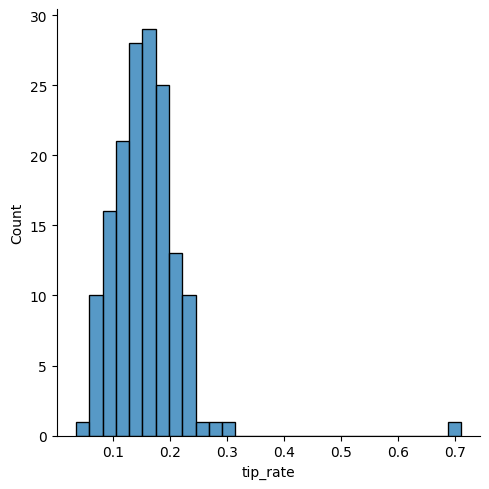

In [15]:
sns.displot(male_tip_rate)

/Users/kimuratoshiyuki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


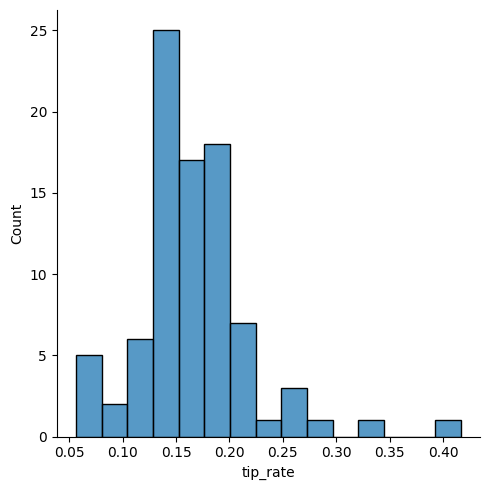

In [16]:
sns.displot(female_tip_rate)

<Axes: xlabel='sex', ylabel='tip_rate'>

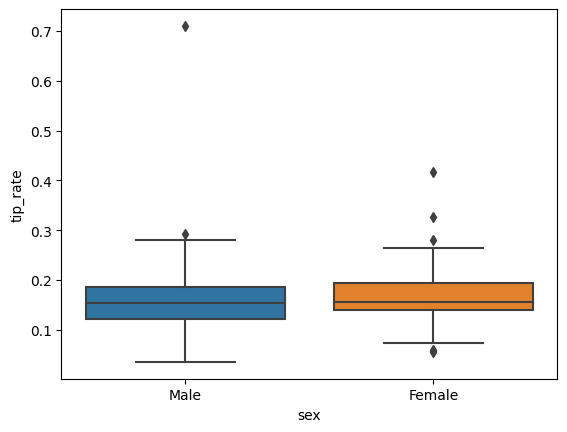

In [17]:
sns.boxplot(data=df, x='sex', y='tip_rate')

## 対応のない平均値差の検定（t検定）
- 全く連動していない別々の平均値の検定をしたい場合に使用する

In [18]:
print(len(male_tip_rate), len(female_tip_rate))

157 87


# Q-Qプロット

In [19]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [20]:
male_tipr = df[df['sex']=='Male']['tip_rate']

In [21]:
female_tipr = df[df['sex']=='Female']['tip_rate']

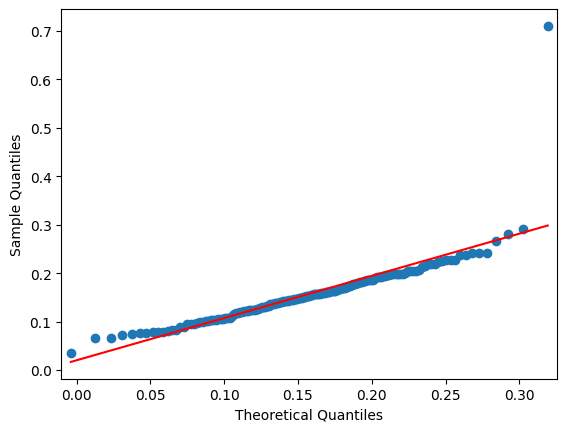

In [22]:
fig = qqplot(male_tipr,
            line='r',
            dist=stats.norm(loc=np.mean(male_tipr), scale=np.sqrt(stats.tvar(male_tipr))))

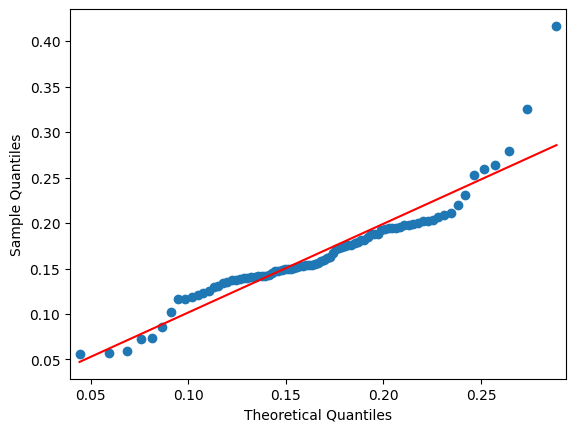

In [23]:
fig = qqplot(female_tipr,
            line='r',
            dist=stats.norm(loc=np.mean(female_tipr), scale=np.sqrt(stats.tvar(female_tipr))))

# シャピロウィルクの検定

In [24]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447848916053772, pvalue=3.2243768151486588e-15)

In [25]:
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982975482940674, pvalue=4.718069249065593e-06)

In [26]:
# 外れ値を取り除く
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [27]:
# 外れ値を取り除く
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

In [28]:
# IQR法で外れ値を取り除いてみる
Q1 = np.percentile(female_tipr, 25)
Q3 = np.percentile(female_tipr, 75)
iqr_value = iqr(female_tipr)
lower_bound = Q1 - 1.5 * iqr_value
upper_bound = Q3 + 1.5 * iqr_value

filtered_female_tipr = female_tipr[(female_tipr >= lower_bound) & (female_tipr <= upper_bound)]

In [29]:
stats.shapiro(filtered_female_tipr)

ShapiroResult(statistic=0.9762433767318726, pvalue=0.1368647962808609)

{'whiskers': [<matplotlib.lines.Line2D at 0x14dfdea90>,
 'caps': [<matplotlib.lines.Line2D at 0x14dec1c30>,
 'boxes': [<matplotlib.lines.Line2D at 0x14deada50>,
 'medians': [<matplotlib.lines.Line2D at 0x14df88330>,
 'fliers': [<matplotlib.lines.Line2D at 0x14df28c90>,
 'means': []}

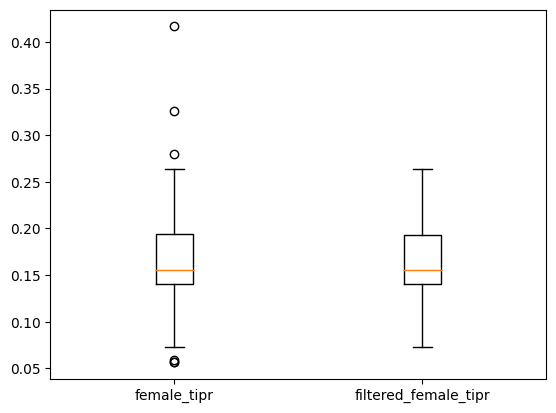

In [30]:
# 2つの箱ヒゲ図を描写
data = [female_tipr, filtered_female_tipr]

plt.boxplot(data, labels=['female_tipr', 'filtered_female_tipr'])

# F分布

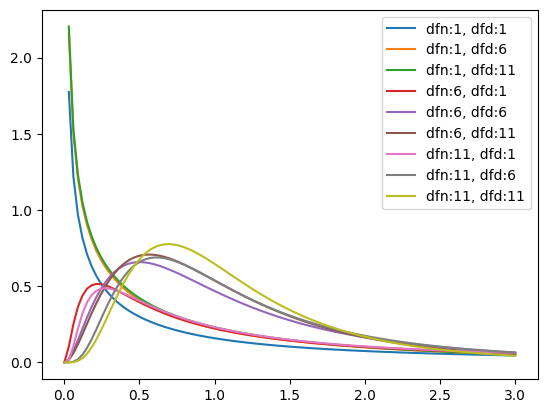

In [31]:
x = np.linspace(0, 3, 100)
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f(dfn, dfd).pdf(x)
        plt.plot(x, y, label=f"dfn:{dfn}, dfd:{dfd}")
plt.legend()

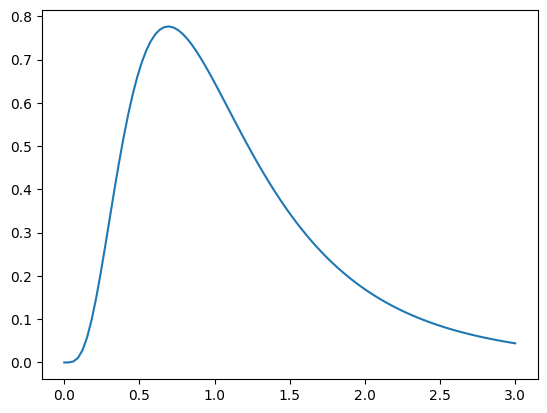

In [32]:
plt.plot(x,y)

# challenge

In [33]:
dfn = len(male_tipr) - 1
dfd = len(female_tipr) - 1

In [34]:
stats.f(dfn,dfd).pdf(x)

array([0.00000000e+00, 8.93506473e-66, 2.89266192e-45, 3.02173849e-34,
       4.76002972e-27, 6.66130453e-22, 5.03711544e-18, 5.35322510e-15,
       1.40731780e-12, 1.31276770e-10, 5.54220763e-09, 1.25674046e-07,
       1.73376888e-06, 1.59727058e-05, 1.05521767e-04, 5.28426257e-04,
       2.09599050e-03, 6.82147494e-03, 1.87457224e-02, 4.45335825e-02,
       9.32640610e-02, 1.75014146e-01, 2.98358904e-01, 4.67499474e-01,
       6.80028946e-01, 9.26176770e-01, 1.18983858e+00, 1.45108116e+00,
       1.68938347e+00, 1.88676353e+00, 2.03011550e+00, 2.11241025e+00,
       2.13275094e+00, 2.09552276e+00, 2.00899460e+00, 1.88373300e+00,
       1.73111579e+00, 1.56212739e+00, 1.38651488e+00, 1.21230326e+00,
       1.04561731e+00, 8.90733306e-01, 7.50280599e-01, 6.25522688e-01,
       5.16663051e-01, 4.23138078e-01, 3.43874542e-01, 2.77501144e-01,
       2.22512131e-01, 1.77386426e-01, 1.40668563e-01, 1.11018797e-01,
       8.72396792e-02, 6.82855818e-02, 5.32606231e-02, 4.14092564e-02,
      

## 答え合わせ

In [35]:
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
f = var1 / var2
print(f)

1.4588472200534603


In [36]:
print(var1, var2)

0.004196172792769981 0.002876362058404039


In [37]:
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.027100863454374447

## p<0.5より低いため帰無仮説は棄却され対立仮説が採用される。つまり等分散ではない

# 対応ありの平均値差の検定

In [38]:
# 血圧のデータの読み込み
bp_df = pd.read_csv('/Users/kimuratoshiyuki/Dropbox/Python/stats/data/blood_pressure.csv')

In [39]:
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'], alternative='greater')

TtestResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411, df=119)

In [40]:
bp_df['bp_before'].mean()

156.45

In [41]:
bp_df['bp_after'].mean()

151.35833333333332

In [42]:
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

In [43]:
bp_df['delta'].mean()

5.091666666666667

<Axes: >

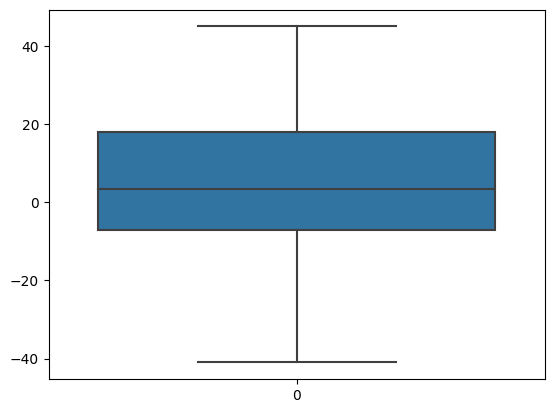

In [44]:
sns.boxplot(bp_df['delta'])

## 検定力は0.8を目指す
- 0.8になるようにサンプルサイズを調整する

# challenge_cohen_d

In [45]:
def cohen_d(x, y):
    n_x = len(x)
    n_y = len(y)
    dof = n_x + n_y - 2
    std = np.sqrt(((n_x - 1) * stats.tvar(x) + (n_y - 1) * stats.tvar(y)) / dof)
    return np.abs((np.mean(x) - np.mean(y))) / std 

In [46]:
male_tip_rate = df[df['sex']=="Male"]['tip_rate']
female_tip_rate = df[df['sex']=="Female"]['tip_rate']

In [47]:
cohen_d(male_tip_rate, female_tip_rate)

0.14480153987269387

# challenge_solve_power

In [48]:
power = TTestIndPower()

In [49]:
male_tip_rate = df[df['sex']=="Male"]['tip_rate']
female_tip_rate = df[df['sex']=="Female"]['tip_rate']

In [50]:
print(male_tip_rate.mean())
print(female_tip_rate.mean())

0.15765054700429743
0.16649073632892478


In [51]:
stats.ttest_ind(female_tip_rate, male_tip_rate, equal_var=False) # ウェルチのT検定

TtestResult(statistic=1.1432770167349968, pvalue=0.2542456188927583, df=206.75874799951296)

## 検定力

In [52]:
effect_size = cohen_d(male_tip_rate, female_tip_rate)
n1 = len(male_tip_rate)
n2 = len(female_tip_rate)
ratio = n2/n1
alpha = 0.05
power.solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05, power=None, ratio=ratio)

0.19038260700802495

In [53]:
effect_size = cohen_d(male_tip_rate, female_tip_rate)
n1 = len(male_tip_rate)
n2 = len(female_tip_rate)
ratio = n2/n1
alpha = 0.05
stats_power = power.solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05, power=None, ratio=ratio)


In [54]:
power.solve_power(effect_size=effect_size, nobs1=None, alpha=alpha, power=0.8, ratio=ratio)

1051.0959553846437

In [55]:
# 女性の必要n数
ratio * 1051

582.4012738853503

# 検定力の推移

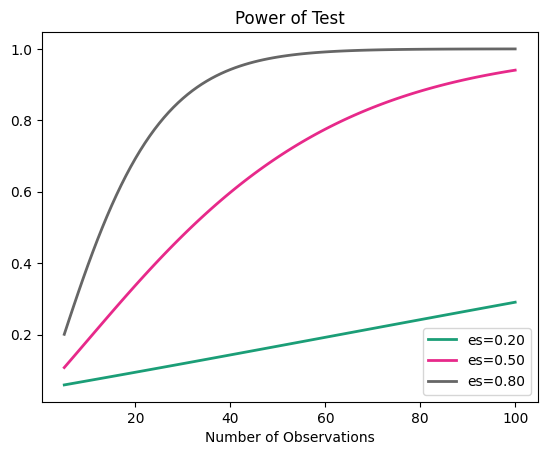

In [56]:
fig = power.plot_power(dep_var='nobs', nobs=np.array(range(5,101)), effect_size=[0.2, 0.5, 0.8], alpha=0.05)

# 歪度
- 平均値1.73%で中央値0.66%の場合
具体的には、歪度はデータの分布が左右対称であるか、それともどちらか一方に偏っているかを示します。

1. **歪度が0の場合**:
    - データは左右対称です。つまり、分布の左側と右側がほぼ同じ形になります。
2. **歪度が正の場合**:
    - データは右に偏っています。つまり、分布の右側の尾（長い部分）が左側よりも長いです。平均よりも大きな値が多い状態です。
3. **歪度が負の場合**:
    - データは左に偏っています。つまり、分布の左側の尾（長い部分）が右側よりも長いです。平均よりも小さな値が多い状態です。
- 平均値が中央値よりも大きい場合、データは右に偏っています。つまり、歪度は正の値を取ります。

# 年次変化率を求める

- Scipyのgmeanの場合

In [57]:
# 変化率
n1 = 145/115
n2 = 171/145
n3 = 196/171
n4 = 204/196
x = np.array([n1, n2, n3, n4])

In [58]:
x

array([1.26086957, 1.17931034, 1.14619883, 1.04081633])

In [59]:
gmean(x)

1.15407247149564

- 年次変化率は15.4%

## pandasの場合

In [60]:
# データフレームの作成
data = {'Year': [1950, 1951, 1952, 1953, 1954],
        'Value': [115, 145, 171, 196, 204]}
df = pd.DataFrame(data)
# 指定の計算を行い、NumPyの配列に格納
x = df['Value'].shift(-1) / df['Value']

# 最後の行はNaNになるので除外
x = x.dropna()

# NumPyの配列に変換
x = x.to_numpy()

# 幾何平均をとる
gmean(x)

1.15407247149564

In [61]:
# shiftすると任意の値分ずらすことができる
# df['購入数量X'].shift(-1)

## 約15.4%となる

# 各指数

In [62]:
# データの準備
data = {
    '購入価格A': [100, 120],
    '購入数量A': [50, 60],
    '購入価格B': [200, 190],
    '購入数量B': [20, 10],
    '購入価格C': [400, 500],
    '購入数量C': [100, 150]
}

# インデックスの設定
index = ['基準年', '比較年']

# データフレームの作成
df = pd.DataFrame(data, index=index)

# 結果の表示
df


,購入価格A,購入数量A,購入価格B,購入数量B,購入価格C,購入数量C
基準年,100,50,200,20,400,100
比較年,120,60,190,10,500,150


In [63]:
# データの準備
data = {
    '購入数量X': [98, 80],
    '平均価格X': [78, 80],
    '購入数量Y': [100, 70],
    '平均価格Y': [84, 90],
    }

# インデックスの設定
index = ['基準年', '比較年']

# データフレームの作成
df = pd.DataFrame(data, index=index)

# 結果の表示
df


,購入数量X,平均価格X,購入数量Y,平均価格Y
基準年,98,78,100,84
比較年,80,80,70,90


## パーシェ指数

In [64]:
x1 = (df.loc['比較年', '平均価格X'] * df.loc['比較年', '購入数量X'])
y1 = (df.loc['比較年', '平均価格Y'] * df.loc['比較年', '購入数量Y']) 
x0 = (df.loc['基準年', '平均価格X'] * df.loc['比較年', '購入数量X'])
y0 = (df.loc['基準年', '平均価格Y'] * df.loc['比較年', '購入数量Y']) 
paasche_index = (x1 + y1)/(x0 + y0)*100
paasche_index

104.78547854785478

- 約104.8％
- 以下のコードがより簡潔に求めた場合

In [65]:
# データフレームの作成
data = {
    '購入数量X': [98, 80],
    '平均価格X': [78, 80],
    '購入数量Y': [100, 70],
    '平均価格Y': [84, 90],
}

df = pd.DataFrame(data, index=['基準年', '比較年'])

# パーシェ指数の計算
paasche_index = ((df.loc['比較年', '平均価格X'] * df.loc['比較年', '購入数量X']) + 
                 (df.loc['比較年', '平均価格Y'] * df.loc['比較年', '購入数量Y'])) / (
                 (df.loc['基準年', '平均価格X'] * df.loc['比較年', '購入数量X']) + 
                 (df.loc['基準年', '平均価格Y'] * df.loc['比較年', '購入数量Y'])) * 100

print(f'パーシェ指数:{paasche_index}')


パーシェ指数:104.78547854785478


In [66]:
df

,購入数量X,平均価格X,購入数量Y,平均価格Y
基準年,98,78,100,84
比較年,80,80,70,90


## ラスパイレス指数も計算してみる

In [67]:
# ラスパイレス指数の計算
laspeyres_index = ((df.loc['比較年', '平均価格X'] * df.loc['基準年', '購入数量X']) + 
                 (df.loc['比較年', '平均価格Y'] * df.loc['基準年', '購入数量Y'])) / (
                 (df.loc['基準年', '平均価格X'] * df.loc['基準年', '購入数量X']) + 
                 (df.loc['基準年', '平均価格Y'] * df.loc['基準年', '購入数量Y'])) * 100

print(f'ラスパイレス指数:{laspeyres_index}')


ラスパイレス指数:104.9613562702568


# 問4

In [68]:
tokyo_basis = 51907538 * 0.13 * ((100 - 57)/100)
tokyo_basis

2901631.3742

## 問5

In [69]:
def ski_jump_func(x):
    ski_point = 60 + 2 * (x - 98)
    return ski_point

In [70]:
ski_jump_func(105.5)

75.0

## 共分散について復習する

In [71]:
x = [1, 2, 3]
y = [-4, 5, 16]
np.cov(x, y, bias=True) # True=nで割った分散

array([[ 0.66666667,  6.66666667],
       [ 6.66666667, 66.88888889]])

In [72]:
df = sns.load_dataset('tips')

df['tip_rate'] = df['tip'] / df['total_bill']

In [73]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [74]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [75]:
# 多変数の場合
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)

In [76]:
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

# 相関行列

In [82]:
np.corrcoef([1, 4, 5], [5, 6, 8])

array([[1.        , 0.89104211],
       [0.89104211, 1.        ]])

In [83]:
np.corrcoef(df['tip'], df['tip_rate'])

array([[1.        , 0.34236962],
       [0.34236962, 1.        ]])

In [84]:
# 多変数の場合
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

## dfのカテゴリカル・データを数値化する

In [93]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [96]:
# カテゴリカル変数を数値に変換
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])

In [98]:
df.corr()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315,-0.338624
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299,0.342370
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195,-0.069475
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178,0.030820
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510,0.025356
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411,0.033914
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.069475,0.030820,0.025356,0.033914,-0.142860,1.000000


## ヒートマップ

In [100]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,0,2,0,2,0.059447
1,10.34,1.66,1,0,2,0,3,0.160542
2,21.01,3.50,1,0,2,0,3,0.166587
3,23.68,3.31,1,0,2,0,2,0.139780
4,24.59,3.61,0,0,2,0,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3,0.203927
240,27.18,2.00,0,1,1,0,2,0.073584
241,22.67,2.00,1,1,1,0,2,0.088222
242,17.82,1.75,1,0,1,0,2,0.098204


<Axes: >

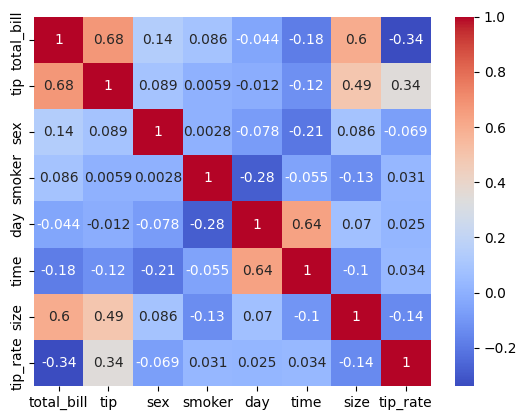

In [101]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## 2021_問６
- 問題文ないとかなり厳しいなこれ

In [110]:
n = 10
x_sum = 346.3
y_sum = 121.8
xy_sum = 4548.7
x_mean = x_sum / n
y_mean = y_sum / n
xy_corr = xy_sum - (n * x_mean * y_mean)

In [112]:
x_tvar = 167.4
y_tvar = 11.6
r = (xy_corr / (n - 1)) / (np.sqrt(x_tvar) * np.sqrt(y_tvar))

In [114]:
# 相関係数
r

0.8340107152456882

# 確率分布の復習_Udemy


In [122]:
# 確率変量
stats.randint(1, 7).mean()

3.5

In [123]:
# ランダムな値を返す
stats.uniform(0, 1).rvs()

0.17268783402474663

# 離散型確率変数と連続型確率変数
- とびとびの値をとる確率変数->離散型確率変数
- 連続の値をとる確率変数->連続型確率変数
- 確率変量関数(PMF: Probability Mass Function)
- 確率密度関数(PDF: Probability Density Function)

In [124]:
86 * 2

172